# European Soccer Analysis ⚽ 📈

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 📜

The dataset we shall be using in this project is the [European Soccer Database](https://www.kaggle.com/datasets/hugomathien/soccer) ⚽. It contains data from soccer matches, players, and teams from several European countries which runs from 2008/2009 to 2015/2016 season. Originally it is available as an sql database but I managed to get the tables as ".csv" from [Udacity](https://www.udacity.com/).
The tables provided include:

|Table	  |Total Rows|Total Columns|
|:--------|----------|------------:|              
|Country         |11	|2|
|League |11	|3|
|Match	|25979|115|
|Player	|11060|7|
|Player_Attributes|183978|42|
|Team	|299	|5|
|Team_Attributes|	1458|	25|

These tables combined provide information on:
- +25,000 matches
- +10,000 players
- 11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
- Team line up with squad formation (X, Y coordinates)
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches

<a name='questions'></a>
### Questions for Analysis  🔎

  **A) Season-specific analysis**
  > Case Study : **2️⃣0️⃣1️⃣5️⃣ / 2️⃣0️⃣1️⃣6️⃣ season**
  >
  > 🗣️ _Here we shall be focusing on events that occured during the 2015/2016 season across all leagues_
    
    1) Which league witnessed the most goals?
    2) Were the non-tie matches generally won by the home team? (Note: A non-tie match is one which has a winner)
    

  **B) League-specific Analysis**
   > Case Study : **English Premier League (EPL) 🏴󠁧󠁢󠁥󠁮󠁧󠁿**
   >
   > 🗣️ _Here we shall be focusing on events that occured in the EPL across all seasons_

    3) Which season recorded the least draws? 
    4) Who are the highest league winners?
    5) Does the top scoring team generally win the league?


In [1]:
#importing neccesary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling 🛠️

<a id='gp'></a>
### General Properties
> 🗣️ **Here we will be looking into what type of information our dataset contains and assessing its state.**

In [2]:
# Load the all the data
country_df = pd.read_csv("Database_Soccer/Country.csv")
league_df = pd.read_csv("Database_Soccer/League.csv")
match_df = pd.read_csv("Database_Soccer/Match.csv")
team_df = pd.read_csv("Database_Soccer/Team.csv")
team_attr_df = pd.read_csv("Database_Soccer/Team_Attributes.csv") 
player_df = pd.read_csv("Database_Soccer/Player.csv")
player_attr_df = pd.read_csv("Database_Soccer/Player_Attributes.csv")

Though we have loaded all the tables, we will only work on those required in answering the questions posed previously. These include: **league_df**, **match_df**, and **team_df**. 

> i) **match_df** properties

In [3]:
# first five columns of the match dataframe
match_df.head(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [4]:
#number of rows and columns in the match dataframe
match_df.shape

(25979, 115)

It turns out that **match_df** dataframe has **25979 rows** & **115 columns**. For us to have a better glance into the names of the columns this dataframe contains, we will split it into two 

In [5]:
#check number of duplicated rows if any
match_df.duplicated().sum()

0

In [6]:
#First 60 columns
match_df.columns[:60]

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8', 'away_player_X9', 'away_player_X10',
       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_

In [7]:
#The 55 other columns
match_df.columns[60:]

Index(['home_player_6', 'home_player_7', 'home_player_8', 'home_player_9',
       'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2',
       'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6',
       'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10',
       'away_player_11', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card',
       'cross', 'corner', 'possession', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD',
       'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA',
       'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object')

Now that we have a clearer view of the columns in the _**match_df**_, we can see that there are a lot of columns which will not be needed moving forward. In the [cleaning section](#cleaning) we will get rid of the unneeded ones and only then will we look into the information.

> ii) **team_df** properties 

In [8]:
#first five rows of the team dataframe
team_df.head(5)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [9]:
#number of rows and columns in the team dataframe
team_df.shape

(299, 5)

In [10]:
#number of unique team api id
team_df.team_api_id.nunique()

299

Based the above 2 cells, we confirm that each row corresponds to a single team because number rows equals the number of unique team api ids. This check was to ensure that there will be no conflicts when try to merge this dataframe with that of matches later on.   

In [11]:
#information on the team dataframe
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


Observation on **team_df**:
- The **team_df** has **299 rows** and **5 columns**. 
- All dtype of the columns in this dataframe are appropriate so we would not have to update any. Only the **team_fifa_api_id** has missen values(11)

In order to avoid redundancy, we could get rid of **team_fifa_api_id** because we already have **team_api_id** which is cleaner and available to be used as foreign key for any merge. 

> iii) **league_df** properties 

In [12]:
#number of rows and columns in the league dataframe
league_df.shape

(11, 3)

In [13]:
#information on the league dataframe
league_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


There are no missen values in this dataframe. Also, it has just 3 columns and 11 rows so we can view it entirely.

In [14]:
#display the enire league dataframe
league_df

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


> Now that we have seen the properties of our dataset, let us move forward with cleaning and treating it such that it can be suitable for the Exploratory Data Analysis(**EDA**). 

<a id='cleaning'></a>
### Data Preparation (Data cleaning + Feature engineering)
> 🗣️ **Here we will focus on cleaning our data - getting rid of some nuances noticed [previously](#gp). In addition to just the cleaning, where needed; we will perform some data preparation techniques like feature engineering and merging of the dataframe(s) in a way that will facilitate our [_EDA_](#eda)** 

Let us start by treating our individual dataframes. 

📌 _Here we will create new dataframes so in case we are updating our analysis,we can perform operations without affecting the original dataframes_

> ◦ **match_df**

🗣️ As stated when looking at properties of this dataframe, moving forward - we will only be keeping those that will be necessary in the rest of our analysis. These columns include: 
- _**season**_ : The season in which a given match was played. 
- _**league_id**_: The identifier for the the league(competition) for which the match was played 
- _**date**_: The date the match was played. 
- _**match_api_id**_:The identifier for the match.
- _**home_team_api_id**_: The identifier of home team in that match.
- _**away_team_api_id**_: The identifier of away team in that match.
- _**home_team_goal**_: The number of goals the home team scored that match
- _**away_team_goal**_: The number of goals the away team scored that match

In [15]:
# Create new dataframe for match data keeping only necessary columns
match_df_new = match_df[['season','league_id', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']].copy()

In [16]:
#Get information about the match dataframe
match_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   season            25979 non-null  object
 1   league_id         25979 non-null  int64 
 2   date              25979 non-null  object
 3   match_api_id      25979 non-null  int64 
 4   home_team_api_id  25979 non-null  int64 
 5   away_team_api_id  25979 non-null  int64 
 6   home_team_goal    25979 non-null  int64 
 7   away_team_goal    25979 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.6+ MB


From the above information on our new match dataframe, we will notice that there happens to be no missen value in it. Also, all columns have a appropriate _dtype_ to the exception of _**date**_ which will need to be changed to _datetime dtype_   

In [17]:
#change dtype of date to a "datetime"
match_df_new['date'] = pd.to_datetime(match_df_new['date'])

In [18]:
#view first five rows
match_df_new.head()

,season,league_id,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,2008/2009,1,2008-08-17,492473,9987,9993,1,1
1,2008/2009,1,2008-08-16,492474,10000,9994,0,0
2,2008/2009,1,2008-08-16,492475,9984,8635,0,3
3,2008/2009,1,2008-08-17,492476,9991,9998,5,0
4,2008/2009,1,2008-08-16,492477,7947,9985,1,3


In [19]:
#check information
match_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   season            25979 non-null  object        
 1   league_id         25979 non-null  int64         
 2   date              25979 non-null  datetime64[ns]
 3   match_api_id      25979 non-null  int64         
 4   home_team_api_id  25979 non-null  int64         
 5   away_team_api_id  25979 non-null  int64         
 6   home_team_goal    25979 non-null  int64         
 7   away_team_goal    25979 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 1.6+ MB


In [20]:
#check the number of duplicate rows
match_df_new.duplicated().sum()

0

Our new match data(_**match_df_new**_) has all columns in a correct dtype and we can see that no duplicate columns or missen value exists.  

Now using some of the above selected features, we will also engineer(create) new ones that will help us answer some of our [research questions](#questions). Some useful features we will be creating are:
- _**match_outcome**_: It has 3 categories which are:    
    - "**home_win**" if the match was won by the home team,    
    - "**away_win**" if the match was won by the away team,   
    - "**draw**" if the match ended up in a tie(draw) between both teams
- _**home_team_point**_:  The value here will be:
    - **3** if the home team won the match ,
    - **1** if the home team drew the match
    - **0** if the home team lost the match
- _**away_team_point**_: The value here will be:
    - **3** if the away team won the match ,
    - **1** if the away team drew the match
    - **0** if the away team lost the match

In [21]:
#Create a fuction returns the match outcome
def assign_MatchOutcome(home_team_goal, away_team_goal):
    if home_team_goal > away_team_goal:
        return 'home_win'
    if home_team_goal == away_team_goal:
        return 'draw'
    if home_team_goal < away_team_goal:
        return 'away_win'
    
#Create a fuction returns the home team's point    
def assign_HomeTeamPoint(match_outcome):
    if match_outcome == 'home_win':
        return 3
    if match_outcome == 'draw':
        return 1
    if match_outcome == 'away_win':
        return 0
#Create a fuction returns the away team's point    
def assign_AwayTeamPoint(match_outcome):
    if match_outcome == 'home_win':
        return 0
    if match_outcome == 'draw':
        return 1
    if match_outcome == 'away_win':
        return 3    

In [22]:
# Create the match_outcome, home_team_point and away_team_point columns and assign their corresponding value
match_df_new["match_outcome"] = match_df_new.apply(lambda row: assign_MatchOutcome(row["home_team_goal"],row["away_team_goal"]), axis = 1)
match_df_new["home_team_point"] = match_df_new.apply(lambda row: assign_HomeTeamPoint(row["match_outcome"]), axis = 1)
match_df_new["away_team_point"] = match_df_new.apply(lambda row: assign_AwayTeamPoint(row["match_outcome"]), axis = 1)

In [23]:
# view the first 5 rows
match_df_new.head()

,season,league_id,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,match_outcome,home_team_point,away_team_point
0,2008/2009,1,2008-08-17,492473,9987,9993,1,1,draw,1,1
1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,draw,1,1
2,2008/2009,1,2008-08-16,492475,9984,8635,0,3,away_win,0,3
3,2008/2009,1,2008-08-17,492476,9991,9998,5,0,home_win,3,0
4,2008/2009,1,2008-08-16,492477,7947,9985,1,3,away_win,0,3


In [24]:
# check information to ensure there are no missen values and dtypes are appropriate
match_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   season            25979 non-null  object        
 1   league_id         25979 non-null  int64         
 2   date              25979 non-null  datetime64[ns]
 3   match_api_id      25979 non-null  int64         
 4   home_team_api_id  25979 non-null  int64         
 5   away_team_api_id  25979 non-null  int64         
 6   home_team_goal    25979 non-null  int64         
 7   away_team_goal    25979 non-null  int64         
 8   match_outcome     25979 non-null  object        
 9   home_team_point   25979 non-null  int64         
 10  away_team_point   25979 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 2.2+ MB


The new match dataframe has been created, cleaned and all new features added.

> Next up we will be looking at the **team_df**

The _**team_fifa_api_id**_ is the only column in this dataframe that has missen values. We will be dropping it since we already have **team_api_id** that will be used as foreign key when merging with another dataframe. Also, the _**id**_ dispensable, so we will get rid of it.

In [25]:
#Drop the dispensable columns 
team_df.drop(['team_fifa_api_id', 'id'], axis=1, inplace=True)

In [26]:
# check information
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team_api_id      299 non-null    int64 
 1   team_long_name   299 non-null    object
 2   team_short_name  299 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.1+ KB


In [27]:
#display first five columns
team_df.head()

,team_api_id,team_long_name,team_short_name
0,9987,KRC Genk,GEN
1,9993,Beerschot AC,BAC
2,10000,SV Zulte-Waregem,ZUL
3,9994,Sporting Lokeren,LOK
4,9984,KSV Cercle Brugge,CEB


The **team_df** has no missen is proper. We kept the **team_short_name** because it would be useful to use as tick label when plotting data on teams

> For the **league_df**, we will have to:
>  - rename the **id** column to **league_id** so that it can be easily identifiable in merges.  
>  - discard the **country_id** because it is non-essential for the rest of our analysis.

In [28]:
league_df.rename(columns = {'id':'league_id'}, inplace = True)
league_df.drop(['country_id'], axis=1, inplace=True)
league_df

,league_id,name
0,1,Belgium Jupiler League
1,1729,England Premier League
2,4769,France Ligue 1
3,7809,Germany 1. Bundesliga
4,10257,Italy Serie A
5,13274,Netherlands Eredivisie
6,15722,Poland Ekstraklasa
7,17642,Portugal Liga ZON Sagres
8,19694,Scotland Premier League
9,21518,Spain LIGA BBVA


Now that we have treated all our relevant dataframes( **match_df_new, team_df & league_df**), we can move forward with merging them such as it would be easier to perform our EDA.

In [29]:
#merge the match dataframe with the league dataframe
df_combined = match_df_new.merge(league_df, on = 'league_id', how = 'left')
# rename name and date for identifiability
df_combined.rename(columns={'name': 'league_name', 'date': 'match_date'}, inplace =True)
df_combined.head()

,season,league_id,match_date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,match_outcome,home_team_point,away_team_point,league_name
0,2008/2009,1,2008-08-17,492473,9987,9993,1,1,draw,1,1,Belgium Jupiler League
1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,draw,1,1,Belgium Jupiler League
2,2008/2009,1,2008-08-16,492475,9984,8635,0,3,away_win,0,3,Belgium Jupiler League
3,2008/2009,1,2008-08-17,492476,9991,9998,5,0,home_win,3,0,Belgium Jupiler League
4,2008/2009,1,2008-08-16,492477,7947,9985,1,3,away_win,0,3,Belgium Jupiler League


Now we will merge the (**match + league**) dataframe with the team dataframe such that it includes information of the **team dataframe** such that it includes information on both the home and away team  

In [30]:
#include information on the home team 
df_combined = df_combined.merge(team_df, left_on='home_team_api_id', right_on='team_api_id', how='left')

#rename long and short names such they reflect the home team 
df_combined.rename(columns = {'team_long_name':'home_team_longname', 'team_short_name':'home_team_shortname'}, inplace = True)

#drop team_api_id from combined dataframe because it is not needed 
df_combined.drop('team_api_id', axis=1, inplace=True)
df_combined.head()

,season,league_id,match_date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,match_outcome,home_team_point,away_team_point,league_name,home_team_longname,home_team_shortname
0,2008/2009,1,2008-08-17,492473,9987,9993,1,1,draw,1,1,Belgium Jupiler League,KRC Genk,GEN
1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,draw,1,1,Belgium Jupiler League,SV Zulte-Waregem,ZUL
2,2008/2009,1,2008-08-16,492475,9984,8635,0,3,away_win,0,3,Belgium Jupiler League,KSV Cercle Brugge,CEB
3,2008/2009,1,2008-08-17,492476,9991,9998,5,0,home_win,3,0,Belgium Jupiler League,KAA Gent,GEN
4,2008/2009,1,2008-08-16,492477,7947,9985,1,3,away_win,0,3,Belgium Jupiler League,FCV Dender EH,DEN


In [31]:
#include information on the away team
df_combined = df_combined.merge(team_df, left_on='away_team_api_id', right_on='team_api_id', how='left')
df_combined.rename(columns = {'team_long_name':'away_team_longname', 'team_short_name':'away_team_shortname'}, inplace = True)
df_combined.head()

,season,league_id,match_date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,match_outcome,home_team_point,away_team_point,league_name,home_team_longname,home_team_shortname,team_api_id,away_team_longname,away_team_shortname
0,2008/2009,1,2008-08-17,492473,9987,9993,1,1,draw,1,1,Belgium Jupiler League,KRC Genk,GEN,9993,Beerschot AC,BAC
1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,draw,1,1,Belgium Jupiler League,SV Zulte-Waregem,ZUL,9994,Sporting Lokeren,LOK
2,2008/2009,1,2008-08-16,492475,9984,8635,0,3,away_win,0,3,Belgium Jupiler League,KSV Cercle Brugge,CEB,8635,RSC Anderlecht,AND
3,2008/2009,1,2008-08-17,492476,9991,9998,5,0,home_win,3,0,Belgium Jupiler League,KAA Gent,GEN,9998,RAEC Mons,MON
4,2008/2009,1,2008-08-16,492477,7947,9985,1,3,away_win,0,3,Belgium Jupiler League,FCV Dender EH,DEN,9985,Standard de Liège,STL


In [32]:
# view index each of the columns in our combined dataframe
for i, v in enumerate(df_combined.columns):
    print(i, v)

0 season
1 league_id
2 match_date
3 match_api_id
4 home_team_api_id
5 away_team_api_id
6 home_team_goal
7 away_team_goal
8 match_outcome
9 home_team_point
10 away_team_point
11 league_name
12 home_team_longname
13 home_team_shortname
14 team_api_id
15 away_team_longname
16 away_team_shortname


In [33]:
#drop other unneeded columns using their index
df_combined.drop(df_combined.iloc[: ,(np.r_[1, 3:6, 13, 14, 16])] ,axis = 1, inplace =True)

In [34]:
# rename columns for both home and away team names
df_combined.rename(columns = {'home_team_longname':'home_team_name', 'away_team_longname':'away_team_name'}, inplace = True)

In [35]:
# create new column to store total number of goals scored for each match 
df_combined["match_goals"] = df_combined["home_team_goal"] + df_combined["away_team_goal"]
df_combined.head()

,season,match_date,home_team_goal,away_team_goal,match_outcome,home_team_point,away_team_point,league_name,home_team_name,away_team_name,match_goals
0,2008/2009,2008-08-17,1,1,draw,1,1,Belgium Jupiler League,KRC Genk,Beerschot AC,2
1,2008/2009,2008-08-16,0,0,draw,1,1,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,0
2,2008/2009,2008-08-16,0,3,away_win,0,3,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,3
3,2008/2009,2008-08-17,5,0,home_win,3,0,Belgium Jupiler League,KAA Gent,RAEC Mons,5
4,2008/2009,2008-08-16,1,3,away_win,0,3,Belgium Jupiler League,FCV Dender EH,Standard de Liège,4


Now that our data has been prepared, we now move over to our **EDA** - where we shall be answering the [questions posed](#questions)  

<a id='eda'></a>
## Exploratory Data Analysis 🕵️📊📈


### A) Season-specific analysis : 2015/2016 season

Here we will start creating a dataframe to store data for the 2016 season only 

In [36]:
#create a new dataframe that contains data for the 2015/16 season only
df_15_16 = df_combined.query('season == "2015/2016"').copy()

In [37]:
#information about the 2015/16 dataframe
df_15_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3326 entries, 1488 to 25978
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           3326 non-null   object        
 1   match_date       3326 non-null   datetime64[ns]
 2   home_team_goal   3326 non-null   int64         
 3   away_team_goal   3326 non-null   int64         
 4   match_outcome    3326 non-null   object        
 5   home_team_point  3326 non-null   int64         
 6   away_team_point  3326 non-null   int64         
 7   league_name      3326 non-null   object        
 8   home_team_name   3326 non-null   object        
 9   away_team_name   3326 non-null   object        
 10  match_goals      3326 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 311.8+ KB


In [38]:
#reset index and drop the old index 
df_15_16.reset_index(drop=True, inplace = True)

In [39]:
# display first five columns
df_15_16.head()

,season,match_date,home_team_goal,away_team_goal,match_outcome,home_team_point,away_team_point,league_name,home_team_name,away_team_name,match_goals
0,2015/2016,2015-07-24,2,1,home_win,3,0,Belgium Jupiler League,Sint-Truidense VV,Club Brugge KV,3
1,2015/2016,2015-07-25,2,1,home_win,3,0,Belgium Jupiler League,KV Kortrijk,Standard de Liège,3
2,2015/2016,2015-07-25,3,1,home_win,3,0,Belgium Jupiler League,KRC Genk,Oud-Heverlee Leuven,4
3,2015/2016,2015-07-25,3,1,home_win,3,0,Belgium Jupiler League,KV Oostende,KV Mechelen,4
4,2015/2016,2015-07-25,3,1,home_win,3,0,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,4


In [40]:
#number of rows and columns
df_15_16.shape

(3326, 11)

In this 2015/2016 season dataframe we have **11 columns(features)** characterizing **3326 rows(matches)**. 

In [41]:
#summary statistics for the numeric columns in our dataframe
df_15_16.describe()

,home_team_goal,away_team_goal,home_team_point,away_team_point,match_goals
count,3326.000000,3326.000000,3326.000000,3326.000000,3326.000000
mean,1.543897,1.210764,1.573061,1.169874,2.754660
std,1.318360,1.154169,1.315694,1.275686,1.668803
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,3.000000
75%,2.000000,2.000000,3.000000,3.000000,4.000000
max,10.000000,9.000000,3.000000,3.000000,12.000000


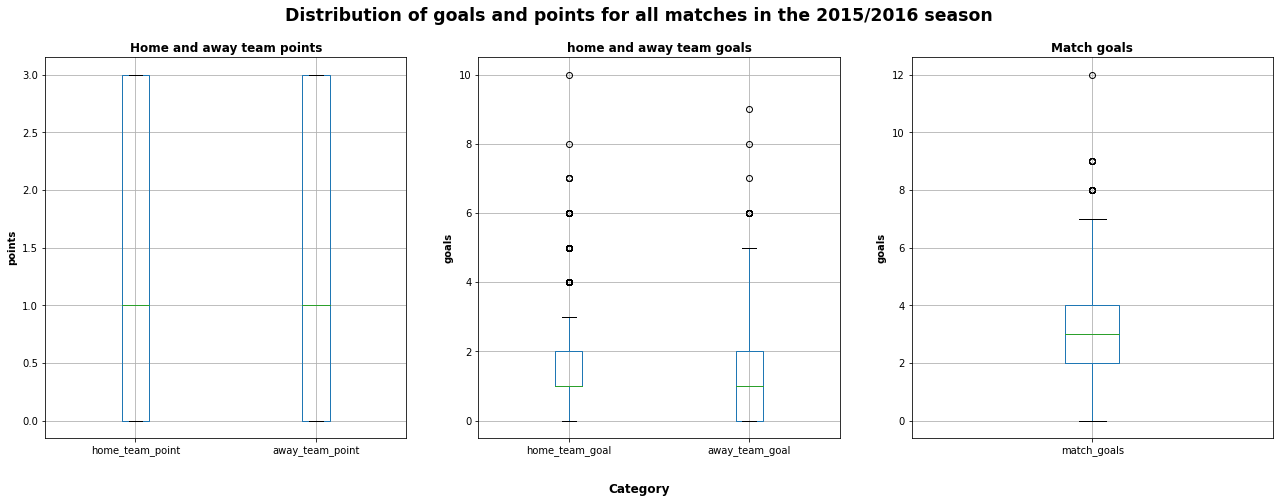

In [42]:
#distribution of goals and points for matches in the 2015/16 season  
fig, ax = plt.subplots(1, 3, figsize=(22, 7))

ax1 = df_15_16.boxplot(['home_team_point','away_team_point'], ax=ax[0])
ax1.set_ylabel("points", labelpad=5, fontweight='semibold')
ax1.set_title("Home and away team points", fontweight='semibold')

ax2 = df_15_16.boxplot(['home_team_goal','away_team_goal'], ax=ax[1])
ax2.set_ylabel("goals", labelpad= 5, fontweight='semibold')
ax2.set_title("home and away team goals", fontweight='semibold')

ax3 = df_15_16.boxplot(['match_goals'], ax=ax[2]);
ax3.set_ylabel("goals", labelpad=5, fontweight='semibold')
ax3.set_title("Match goals", fontweight='semibold')

fig.suptitle("Distribution of goals and points for all matches in the 2015/2016 season", weight='bold', size = 'xx-large');
fig.supxlabel("Category", fontweight='semibold');

The summary statistics shows that the largest home team goals recorded during the 2015/2016 season is **10 goals**. Also we see the distribution of both home and away team point having their maximum and minimum at 3 and 0 respectively just as it ought to be.   

#### 1) What were the top 5 most prolific?

In [43]:
#Total number of goals scored in each league during the 2015/2016 season
df_15_16.groupby('league_name')['match_goals'].sum().sort_values(ascending = False)

league_name
Spain LIGA BBVA             1043
England Premier League      1026
Italy Serie A                979
France Ligue 1               960
Netherlands Eredivisie       912
Germany 1. Bundesliga        866
Portugal Liga ZON Sagres     831
Belgium Jupiler League       694
Scotland Premier League      650
Poland Ekstraklasa           635
Switzerland Super League     566
Name: match_goals, dtype: int64

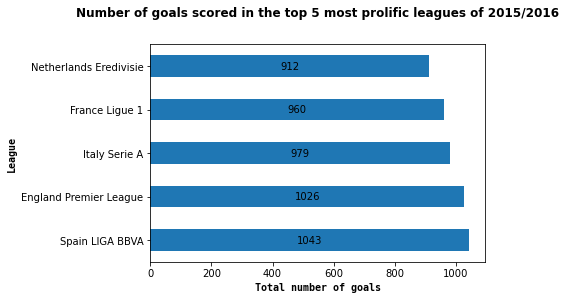

In [44]:
# Get the top 5 leagues in terms of total goals witnessed through out the season
top5_prolific_leagues = df_15_16.groupby('league_name')['match_goals'].sum().nlargest(5)

#plot the number of goals scored by these top five prolific leagues
tplax = top5_prolific_leagues.plot(kind = 'barh');
tplax.bar_label(tplax.containers[0], label_type = 'center')
plt.title('Number of goals scored in the top 5 most prolific leagues of 2015/2016', fontweight="bold",  y=1.1)
plt.ylabel("League" , fontfamily = 'monospace', fontweight= 'semibold');
plt.xlabel("Total number of goals", fontfamily = 'monospace', fontweight= 'semibold');

Using the above analysis, it appears that in the **2015/2016 season**, the **most** and **least prolific leagues** were the **Spain LIGA BBVA** with **1043 goals** and the **Switzerland Super League** with **566 goals**.

#### 2) Were the non-tie matches generally won by the home team?

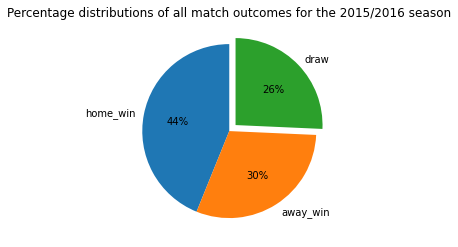

In [45]:
# plot the percentage distribution of match outcomes during the 2015/2016 season
df_15_16.match_outcome.value_counts().plot(kind='pie', autopct='%1.0f%%', explode=(0, 0, 0.1),label='', startangle=90);
plt.title("Percentage distributions of all match outcomes for the 2015/2016 season");

We can see from pie chart that in the **2015/2016 season**, only **26%** of the matches resulted in a draw while. Also, a **home win** turned out to be the highest observed match outcome during the same season.

In [46]:
#number of matches which ended in a tie between opponents
draw_mask_15_16 = df_15_16['match_outcome'] == 'draw'
draw_15_16_count = len(df_15_16[draw_mask_15_16])

#number of matches which did not end in a tie
nondraw_15_16 = df_15_16[~draw_mask_15_16] 
nondraw_15_16_count = len(nondraw_15_16)


bold_start = '\033[1m'
bold_end = "\033[0;0m" 
print("Out of"+bold_start, len(df_15_16), "matches"+bold_end, "played across the 11 european leagues in the 2015/2016 season,"+bold_start, draw_15_16_count, bold_end+"ended up in a tie while the"+bold_start, nondraw_15_16_count, bold_end+"others solded in a victory for one the opponents")

Out of 3326 matches played across the 11 european leagues in the 2015/2016 season, 855 ended up in a tie while the 2471 others solded in a victory for one the opponents


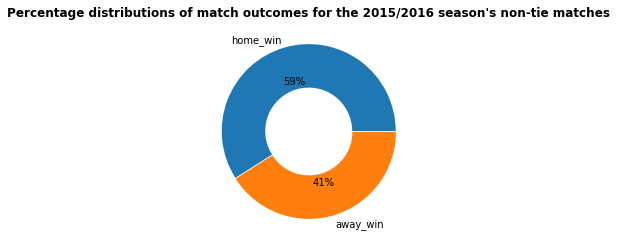

In [47]:
# plot the percentage distribution of match outcomes for the 2015/2016 season's non-tie matches
nondraw_15_16.match_outcome.value_counts().plot(kind='pie', autopct='%1.0f%%', explode = (0, 0.01), label='', wedgeprops=dict(width=.5));
plt.title("Percentage distributions of match outcomes for the 2015/2016 season's non-tie matches", fontweight = 'bold');

Just as noticed when viewing the proportion of all match outcomes, a home win stills turns out to be the most witnessed non-tie match outcome during the 2015/2016 season. 

### B) League-specific Analysis :  England Premier League (EPL) 🏴󠁧󠁢󠁥󠁮󠁧󠁿

Here we will start by creating a dataframe containing EPL data only.

In [48]:
#create a new dataframe that contains data for the English Premier League only
df_epl = df_combined.query('league_name == "England Premier League"').copy()

In [49]:
df_epl.head()

,season,match_date,home_team_goal,away_team_goal,match_outcome,home_team_point,away_team_point,league_name,home_team_name,away_team_name,match_goals
1728,2008/2009,2008-08-17,1,1,draw,1,1,England Premier League,Manchester United,Newcastle United,2
1729,2008/2009,2008-08-16,1,0,home_win,3,0,England Premier League,Arsenal,West Bromwich Albion,1
1730,2008/2009,2008-08-16,0,1,away_win,0,3,England Premier League,Sunderland,Liverpool,1
1731,2008/2009,2008-08-16,2,1,home_win,3,0,England Premier League,West Ham United,Wigan Athletic,3
1732,2008/2009,2008-08-17,4,2,home_win,3,0,England Premier League,Aston Villa,Manchester City,6


In [50]:
df_epl.reset_index(drop=True, inplace = True)

In [51]:
df_epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           3040 non-null   object        
 1   match_date       3040 non-null   datetime64[ns]
 2   home_team_goal   3040 non-null   int64         
 3   away_team_goal   3040 non-null   int64         
 4   match_outcome    3040 non-null   object        
 5   home_team_point  3040 non-null   int64         
 6   away_team_point  3040 non-null   int64         
 7   league_name      3040 non-null   object        
 8   home_team_name   3040 non-null   object        
 9   away_team_name   3040 non-null   object        
 10  match_goals      3040 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 261.4+ KB


We can observe that our EPL dataframe we have **3040 rows** and **11 columns** - all having appropriate dtype and no missen value.

Now let us get a summary statistics of the numeric columns it contains. 

In [52]:
df_epl.describe()

,home_team_goal,away_team_goal,home_team_point,away_team_point,match_goals
count,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000
mean,1.550987,1.159539,1.629276,1.113158,2.710526
std,1.311615,1.144629,1.311000,1.259263,1.691127
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,3.000000
75%,2.000000,2.000000,3.000000,3.000000,4.000000
max,9.000000,6.000000,3.000000,3.000000,10.000000


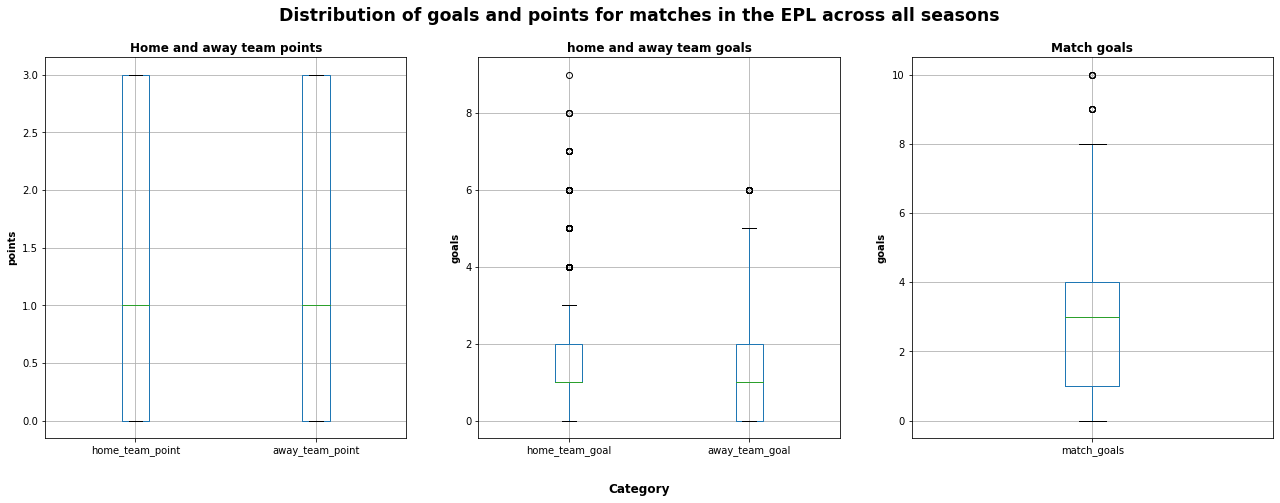

In [53]:
#distribution of goals and points for matches in the EPL across all seasons 
fig, ax = plt.subplots(1, 3, figsize=(22, 7))

ax1 = df_epl.boxplot(['home_team_point','away_team_point'], ax=ax[0])
ax1.set_ylabel("points", labelpad=5, fontweight='semibold')
ax1.set_title("Home and away team points", fontweight='semibold')

ax2 = df_epl.boxplot(['home_team_goal','away_team_goal'], ax=ax[1])
ax2.set_ylabel("goals", labelpad= 5, fontweight='semibold')
ax2.set_title("home and away team goals", fontweight='semibold')

ax3 = df_epl.boxplot(['match_goals'], ax=ax[2]);
ax3.set_ylabel("goals", labelpad=5, fontweight='semibold')
ax3.set_title("Match goals", fontweight='semibold')

fig.suptitle("Distribution of goals and points for matches in the EPL across all seasons", weight='bold', size = 'xx-large');
fig.supxlabel("Category", fontweight='semibold');

From the above we notice that in the EPL, the distribution of goals scored by the away team positively scored and half of the matches witnessed 3+ goals.

#### 3) What season recorded the least draws

In [54]:
#select epl matches that ended up in a tie and count them
df_epl_draw = df_epl[df_epl['match_outcome']=='draw']
epl_draw_count = df_epl_draw.groupby('season')['match_outcome'].apply('count')

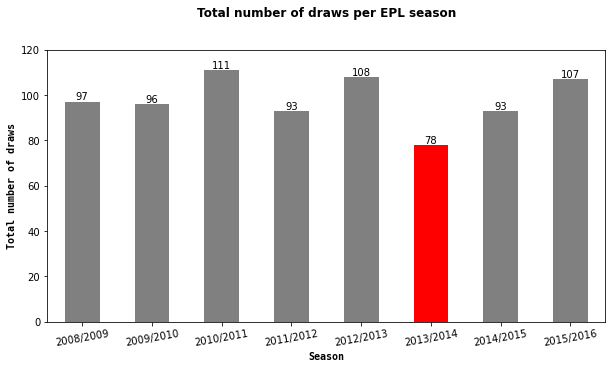

In [55]:
# plot the total number of draws per epl season
colors_draw = ['grey' if (x > min(epl_draw_count)) else 'red' for x in epl_draw_count]
epl_draw_ax = epl_draw_count.plot(kind='bar', figsize=(10, 5), rot=10, ylim = (0,120), color=colors_draw)
epl_draw_ax.bar_label(epl_draw_ax.containers[0]);
plt.title('Total number of draws per EPL season', fontweight="bold",  y=1.1)
plt.xlabel("Season" , fontfamily = 'monospace', fontweight= 'semibold');
plt.ylabel("Total number of draws", fontfamily = 'monospace', fontweight= 'semibold');

The above bar plot highlights that the EPL witnessed least number of draws during the **2013/14** season with a count of **78**. This was followed by both the **2011/2012** and **2014/2015 seasons** in which **93 draws** were recorded.

#### 4)Who are the highest league winners?

In [56]:
# extraxt the goal and point a team got after every match

epl_home=df_epl.loc[:,('home_team_name','home_team_goal','home_team_point', 'match_date', 'season')]
epl_home.rename(index=str, columns={'home_team_name':'team','home_team_goal':'goal', 'home_team_point':'point'}, inplace=True)

epl_away=df_epl.loc[:,('away_team_name','away_team_goal' ,'away_team_point', 'match_date', 'season')]
epl_away.rename(index=str, columns={'away_team_name':'team','away_team_goal':'goal', 'away_team_point':'point'}, inplace=True)

epl_goal_point=pd.concat([epl_home, epl_away], ignore_index=True)
epl_goal_point.head()

,team,goal,point,match_date,season
0,Manchester United,1,1,2008-08-17,2008/2009
1,Arsenal,1,3,2008-08-16,2008/2009
2,Sunderland,0,0,2008-08-16,2008/2009
3,West Ham United,2,3,2008-08-16,2008/2009
4,Aston Villa,4,3,2008-08-17,2008/2009


With the goals and points a team got for each match extracted, we will group each of these teams' goals and points per season to know which the total number of goals and points they got at he end of the season.

In [57]:
# extract total number of goals and points gotten by each team at the end of the season
epl_goal_point_agg = epl_goal_point.groupby(['season','team'],  as_index=False)[['goal', 'point']].apply(sum)
epl_goal_point_agg.head()

,season,team,goal,point
0,2008/2009,Arsenal,68,72
1,2008/2009,Aston Villa,54,62
2,2008/2009,Blackburn Rovers,40,41
3,2008/2009,Bolton Wanderers,41,41
4,2008/2009,Chelsea,68,83


With data on the aggregated sum of points each team got per season, we will determine the winner of each EPL season by finding the team with the highest points.  

In [58]:
# extract information on the winner of each each epl season 
points_idx = epl_goal_point_agg.groupby(['season'])['point'].transform(max) == epl_goal_point_agg['point']
epl_top_points = epl_goal_point_agg[points_idx][['season','team','goal','point']].reset_index(drop=True)
epl_top_points.rename(index=str, columns = {'team':'win_team','goal':'win_team_goals', 'point': 'win_team_points'}, inplace=True)
epl_top_points

,season,win_team,win_team_goals,win_team_points
0,2008/2009,Manchester United,68,90
1,2009/2010,Chelsea,103,86
2,2010/2011,Manchester United,78,80
3,2011/2012,Manchester City,93,89
4,2011/2012,Manchester United,89,89
5,2012/2013,Manchester United,86,89
6,2013/2014,Manchester City,102,86
7,2014/2015,Chelsea,73,87
8,2015/2016,Leicester City,68,81


From the above table we notice that the EPL winner for each season tends to have **80 points and above** and scores a minimum of **68 goals**. Also, Chelsea emerges as the top scoring EPL winner after being able to get **103 goals** during the **2009/2010 season**.

In [59]:
# number of epl trophies gotten 
epl_league_wins = epl_top_points['win_team'].value_counts()

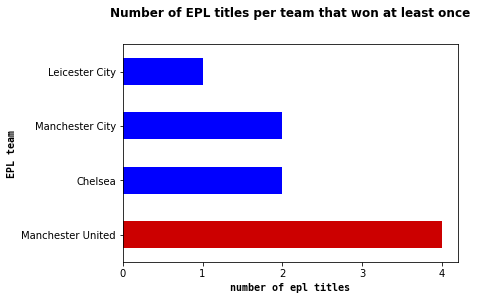

In [60]:
# plot number of epl trophies gotten
colors_win = ['blue' if (x < max(epl_top_points['win_team_points'])) else '#cc0000' for x in epl_top_points['win_team_points']]
epl_league_wins.plot(kind='barh',xticks=[0,1,2,3,4], color=colors_win);
plt.title("Number of EPL titles per team that won at least once", fontweight="bold",  y=1.1)
plt.xlabel("number of epl titles" , fontfamily = 'monospace', fontweight= 'semibold');
plt.ylabel("EPL team", fontfamily = 'monospace', fontweight= 'semibold');

We can notice that for the **9 seasons** of EPL data we have, only **4 teams** suceeded to emerge as winner; **Manchester United**, **Machester City**, **Chelsea** and **Leicester**. Within this period **Manchester United** takes the top position of most crowned being seconded by both Manchester City and Chelsea with **2 titles** each.

#### 5) Does the top scoring team generally win the league?

>    **Note**
> - **Top scoring team** is the team that scored the most goals in a given English Premier League season
> - **Winning team** is the team that earned the most points(won) in a given English Premier League season

In [61]:
# extract information on the top scoring team for each each epl season
goals_idx = epl_goal_point_agg.groupby(['season'])['goal'].transform(max) == epl_goal_point_agg['goal']
epl_top_goals = epl_goal_point_agg[goals_idx][['season','team', 'goal', 'point']].reset_index(drop=True)
epl_top_goals.rename(index=str, columns = {'team':'score_team','goal':'score_team_goals', 'point': 'score_team_points'}, inplace=True)
epl_top_goals

,season,score_team,score_team_goals,score_team_points
0,2008/2009,Liverpool,77,86
1,2009/2010,Chelsea,103,86
2,2010/2011,Manchester United,78,80
3,2011/2012,Manchester City,93,89
4,2012/2013,Manchester United,86,89
5,2013/2014,Manchester City,102,86
6,2014/2015,Manchester City,83,79
7,2015/2016,Manchester City,71,66


From the above table we notice that the top scoring team in the EPL tends to have **71 goals and above** and most often earns **86+ points**. 

Now that we information on winner and top scoring team for each EPL season, we will combine them so as to explore the likelihood of the top scoring team being the winner.  

In [62]:
# combine information on the top scoring team and winner for each each epl season
epl_top_goal_point = epl_top_goals.merge(epl_top_points, on='season')
epl_top_goal_point

,season,score_team,score_team_goals,score_team_points,win_team,win_team_goals,win_team_points
0,2008/2009,Liverpool,77,86,Manchester United,68,90
1,2009/2010,Chelsea,103,86,Chelsea,103,86
2,2010/2011,Manchester United,78,80,Manchester United,78,80
3,2011/2012,Manchester City,93,89,Manchester City,93,89
4,2011/2012,Manchester City,93,89,Manchester United,89,89
5,2012/2013,Manchester United,86,89,Manchester United,86,89
6,2013/2014,Manchester City,102,86,Manchester City,102,86
7,2014/2015,Manchester City,83,79,Chelsea,73,87
8,2015/2016,Manchester City,71,66,Leicester City,68,81


Just by looking at the table we can clearly notice some seasons whereby the league winner was not the top scoring team. Let us get the exact numbers.

In [63]:
#the number of times a EPL team was both winner and most prolific in the same season
eplwinner_scorer_count = len(epl_top_goal_point[epl_top_goal_point['win_team']==epl_top_goal_point['score_team']])
#the number of times a EPL winner was not the most prolific in the same season
eplwinner_notscorer_count= len(epl_top_goal_point) - eplwinner_scorer_count
print("Out of"+bold_start, len(epl_top_goal_point),"EPL seasons"+bold_end+" recorded,"+bold_start, eplwinner_scorer_count, bold_end+"of them ended up with the league winner being the most prolific")

Out of 9 EPL seasons recorded, 5 of them ended up with the league winner being the most prolific


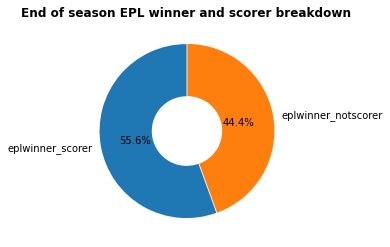

In [64]:
plt.pie([eplwinner_scorer_count, eplwinner_notscorer_count], labels=["eplwinner_scorer", "eplwinner_notscorer"], autopct='%1.1f%%', startangle = 90, explode = (0, 0.01), wedgeprops=dict(width=0.6));
plt.title("End of season EPL winner and scorer breakdown",fontweight = 'bold');

We can observe from the above that though the **EPL winning team was top scorer** more often, there were almost as many instances whereby the winning team was not the top scorer.

<a id='conclusions'></a>
## Conclusions ✍️

In the **2015/2016 season**:

💡 **Spain LIGA BBVA** was the most prolific league with a total of **1043** goals witnessed. They were followed by **England Premier League**, **Italy Serie A**, **France Ligue 1** and **Netherlands Eredivisie** occupying the 2nd , 3rd, 4th, and 5th places respectively.

💡 Non-tie matches are generally more likely won by the **home team** .


---


In the **English Premier League**:

💡 With only **78 draws** witnessed in **3040 matches**, the **2013/2014** season recorded the lowest number.

💡 Manchester United won the most league trophies - holding **4** out the **9** recorded.  

💡 The **top scoring team** is general more likely to the be **winning team** at the end of the season.

---
**Limitation**:

- Insights drawn cannot be used as conclusive evidence to reflect the future of match outcomes reason being that the data used is relatively old and data drift would have probably easily set in. 

**References**

- https://www.kaggle.com/datasets/hugomathien/soccer
- https://stackoverflow.com/questions/64179970/how-to-control-the-color-of-a-specific-column-in-a-bar-plot-depending-on-its-xt
- https://stackoverflow.com/questions/68254094/python-pie-chart-font-size
- https://stackoverflow.com/questions/8924173/how-to-print-bold-text-in-python